# TP1: Análisis exploratorio bike's share

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
plt.style.use('default')
plt.rcParams['figure.figsize']=(17,8)

In [4]:
chunks=pd.read_csv('trip.csv',sep=',',iterator=True,chunksize=10000)
trips = pd.concat([chunk for chunk in chunks])
trips_con_fecha=trips

trips_con_fecha.columns.values

print(trips_con_fecha.shape)

trips_con_fecha['date']= pd.to_datetime(trips['start_date'], format = '%m/%d/%Y  %H:%M')

trips_con_fecha['anio'] = pd.DatetimeIndex(trips_con_fecha['date']).year
trips_con_fecha['mes'] = pd.DatetimeIndex(trips_con_fecha['date']).month
trips_con_fecha['dia'] = pd.DatetimeIndex(trips_con_fecha['date']).day
trips_con_fecha['hora'] = pd.DatetimeIndex(trips_con_fecha['date']).hour
trips_con_fecha['minutos'] = pd.DatetimeIndex(trips_con_fecha['date']).minute

print(trips_con_fecha.describe())

(669959, 11)
                  id      duration  start_station_id  end_station_id  \
count  669959.000000  6.699590e+05     669959.000000   669959.000000   
mean   460382.009899  1.107950e+03         57.851876       57.837438   
std    264584.458487  2.225544e+04         17.112474       17.200142   
min      4069.000000  6.000000e+01          2.000000        2.000000   
25%    231082.500000  3.440000e+02         50.000000       50.000000   
50%    459274.000000  5.170000e+02         62.000000       62.000000   
75%    692601.000000  7.550000e+02         70.000000       70.000000   
max    913460.000000  1.727040e+07         84.000000       84.000000   

             bike_id           anio            mes            dia  \
count  669959.000000  669959.000000  669959.000000  669959.000000   
mean      427.587620    2014.212691       6.476844      15.740027   
std       153.450988       0.683857       3.276798       8.665105   
min         9.000000    2013.000000       1.000000       1.000

# Veo Cantidad por año

<IPython.core.display.Javascript object>


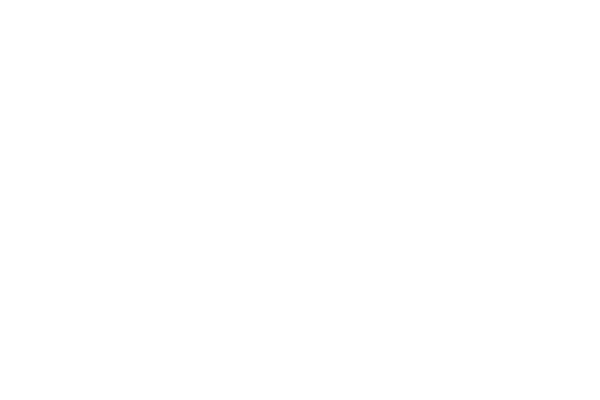

In [5]:
%matplotlib notebook
tri=trips_con_fecha['anio'].value_counts()
ax=tri.plot(kind='bar',title='Cantidad por anio',color='green')
ax.set_ylabel('anio')
ax.set_xlabel('cantidad')

# cantidad por dia de la semana (ORDENAR??)

<IPython.core.display.Javascript object>


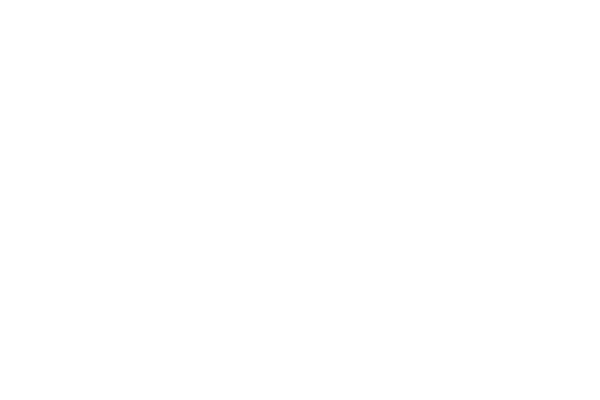

In [6]:
%matplotlib notebook
trips_con_fecha['dia']= trips_con_fecha['date'].dt.dayofweek
tri=trips_con_fecha['dia'].value_counts()
ax=tri.plot(kind='bar',title='Cantidad por dia de la semana',color='green')
ax.set_ylabel('dia')
ax.set_xlabel('cantidad')

# Cantidad por suscripcion

<IPython.core.display.Javascript object>


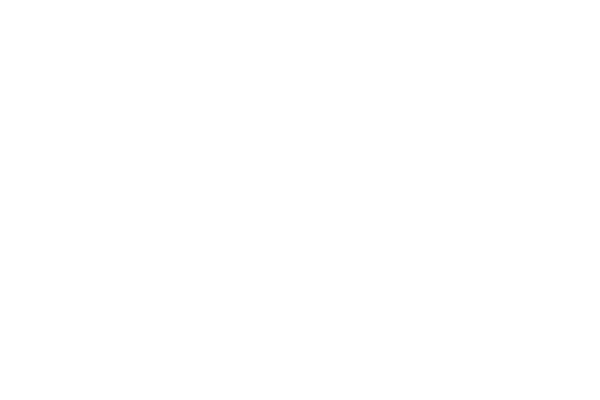

In [7]:
# cantidad total de cada suscripcion
%matplotlib notebook
sub=trips_con_fecha['subscription_type'].value_counts()
su=sub.plot(kind='bar',title='Cantidad por suscripcion',color='green')
su.set_ylabel('Tipo de Suscripcion')
su.set_xlabel('cantidad')

# Cantidades sacadas por hora (ordenar???)

<IPython.core.display.Javascript object>


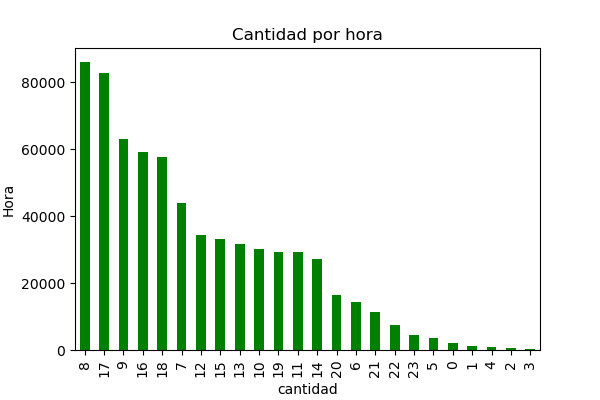

In [44]:
%matplotlib notebook
sub=trips_con_fecha['hora'].value_counts()
su=sub.plot(kind='bar',title='Cantidad por hora',color='green')
su.set_ylabel('Hora')
su.set_xlabel('cantidad')

# Duraciones en segundos

<IPython.core.display.Javascript object>


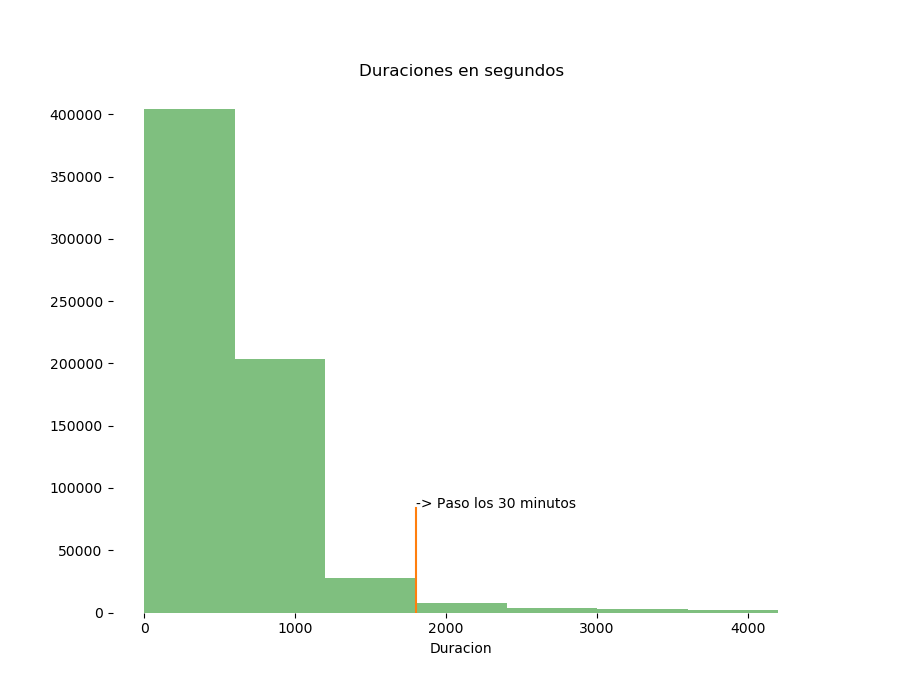

In [84]:
plt.figure(figsize = [9,7])
h = plt.hist(trips_con_fecha['duration'].values,range = [0,4200],alpha = .5,bins=7,facecolor='green')
plt.plot([1800,1800],[0,float(trips_con_fecha.shape[0]/8)],linestyle = '-')
plt.text(1800,float(trips_con_fecha.shape[0]/8),'-> Paso los 30 minutos')
plt.title('Duraciones en segundos')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xlabel('Duracion')
plt.legend()

# Porcentaje de bicis sacadas que no cumplieron el maximo de 30 minutos 

In [22]:
val=trips_con_fecha.loc[trips_con_fecha['duration'] > 1800,:]['duration'].count()/float(trips_con_fecha['duration'].count())   
print(val*100)

5.23539500178


# Porcentaje de bicis sacadas que no cumplieron el maximo de 30 minutos para 24-hour or 3-day membership

In [23]:
val=trips_con_fecha.loc[(trips_con_fecha['duration'] > 1800) & (trips_con_fecha['subscription_type'] == 'Customer'),:]\
                        ['duration'].count()/float(trips_con_fecha['duration'].count())   
print(val*100)


4.66700201057


# Porcentaje de bicis sacadas que no cumplieron el maximo de 30 minutos para annual membership

In [24]:
val=trips_con_fecha.loc[(trips_con_fecha['duration'] > 1800) & (trips_con_fecha['subscription_type'] == 'Subscriber'),:]\
                        ['duration'].count()/float(trips_con_fecha['duration'].count())   
print(val*100)

0.568392991213


# Ratio: cantidad de bicis devueltas/cantidad de bici alquiladas en una estacion

In [25]:
#cantidad total de trips que salieron de cada estacion
estacion_count=trips_con_fecha['start_station_name'].value_counts()

ES= trips_con_fecha['start_station_name']==trips_con_fecha['end_station_name']
est_mismaES=trips_con_fecha[ES]
trips_con_mismaE=est_mismaES['start_station_name'].value_counts()
ratioMISMAES=trips_con_mismaE/ estacion_count


In [26]:
top20=ratioMISMAES.sort_values(ascending=False)[:20]
top20

University and Emerson                   0.591270
San Mateo County Center                  0.292683
Redwood City Public Library              0.253521
San Jose Civic Center                    0.245295
Broadway at Main                         0.238806
California Ave Caltrain Station          0.207602
Palo Alto Caltrain Station               0.187589
Franklin at Maple                        0.169643
Arena Green / SAP Center                 0.145722
Rengstorff Avenue / California Street    0.141718
Cowper at University                     0.122999
Japantown                                0.120419
Park at Olive                            0.120000
Stanford in Redwood City                 0.112385
Evelyn Park and Ride                     0.107978
Mezes Park                               0.105572
Redwood City Caltrain Station            0.099743
San Jose City Hall                       0.095696
San Salvador at 1st                      0.094563
SJSU 4th at San Carlos                   0.094017


# Las 10 estaciones con mas bicis de salida (de lunes a viernes)


In [15]:
top_salidas_semana=trips_con_fecha[['date','start_station_name']]
#los dias van de 0 a 6

trips_semana=(trips_con_fecha['dia']== 0) | (trips_con_fecha['dia']== 1) |(trips_con_fecha['dia']== 2) | (trips_con_fecha['dia']== 3)| (trips_con_fecha['dia']== 4) 
semana=trips_con_fecha[trips_semana]

semana_stats=semana['start_station_name'].value_counts()

In [38]:
top10_salida_lu_vie=semana_stats.sort_values(ascending=False)[:10]
top10_salida_lu_vie

San Francisco Caltrain (Townsend at 4th)         46234
San Francisco Caltrain 2 (330 Townsend)          31706
Harry Bridges Plaza (Ferry Building)             26520
Temporary Transbay Terminal (Howard at Beale)    25084
2nd at Townsend                                  22723
Steuart at Market                                22594
Market at Sansome                                21932
Townsend at 7th                                  21655
Embarcadero at Sansome                           21094
Market at 10th                                   17968
Name: start_station_name, dtype: int64

# Las 10 estaciones con menos bicis de salida (de lunes a viernes)

In [39]:
top10_lu_vie=semana_stats.sort_values(ascending=True)[:10]
top10_lu_vie

San Jose Government Center          22
Broadway at Main                    52
Franklin at Maple                  148
Redwood City Public Library        157
San Mateo County Center            258
Mezes Park                         287
Redwood City Medical Center        294
Stanford in Redwood City           416
Park at Olive                      574
California Ave Caltrain Station    701
Name: start_station_name, dtype: int64

# Las 10 estaciones con mas bicis de salida (sabado y domingo)

In [40]:
top_salidas_finde=trips_con_fecha[['dia','start_station_name']]
trips_finde=(top_salidas_finde['dia']== 5) | (top_salidas_finde['dia']== 6) 
finde=top_salidas_finde[trips_finde]
finde_stats=semana['start_station_name'].value_counts()
top10=semana_stats.sort_values(ascending=False)[:10]
top10

San Francisco Caltrain (Townsend at 4th)         46234
San Francisco Caltrain 2 (330 Townsend)          31706
Harry Bridges Plaza (Ferry Building)             26520
Temporary Transbay Terminal (Howard at Beale)    25084
2nd at Townsend                                  22723
Steuart at Market                                22594
Market at Sansome                                21932
Townsend at 7th                                  21655
Embarcadero at Sansome                           21094
Market at 10th                                   17968
Name: start_station_name, dtype: int64

# Las 10 estaciones con menos bicis de salida (sabado y domingo)

In [41]:
top10_Sab_Dom=semana_stats.sort_values(ascending=True)[:10]
top10_Sab_Dom

San Jose Government Center          22
Broadway at Main                    52
Franklin at Maple                  148
Redwood City Public Library        157
San Mateo County Center            258
Mezes Park                         287
Redwood City Medical Center        294
Stanford in Redwood City           416
Park at Olive                      574
California Ave Caltrain Station    701
Name: start_station_name, dtype: int64

# Las 10 estaciones mas populares de salida de dia laboral en horario pico(7 a 9 y 16 a 18)

In [46]:
trips_con_fecha['dateFin']= pd.to_datetime(trips['end_date'], format = '%m/%d/%Y  %H:%M')
trips_con_fecha['anioE'] = pd.DatetimeIndex(trips_con_fecha['dateFin']).year
trips_con_fecha['mesE'] = pd.DatetimeIndex(trips_con_fecha['dateFin']).month
trips_con_fecha['diaE'] = pd.DatetimeIndex(trips_con_fecha['dateFin']).day
trips_con_fecha['horaE'] = pd.DatetimeIndex(trips_con_fecha['dateFin']).hour
trips_con_fecha['minutosE'] = pd.DatetimeIndex(trips_con_fecha['dateFin']).minute

trips_rush_hour=((trips_con_fecha['horaE']>= 7 )& (trips_con_fecha['horaE']<=9)) |((trips_con_fecha['horaE']>= 16) & \
                    (trips_con_fecha['horaE']<=18))

semana_hora_pico=semana[trips_rush_hour]

estacionesHorarioPico=semana_hora_pico['start_station_name'].value_counts()
top10estacionesHorarioPico=estacionesHorarioPico.sort_values(ascending=False)[:10]
top10estacionesHorarioPico


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


San Francisco Caltrain (Townsend at 4th)         34143
San Francisco Caltrain 2 (330 Townsend)          22550
Temporary Transbay Terminal (Howard at Beale)    18958
Harry Bridges Plaza (Ferry Building)             16961
Steuart at Market                                15489
2nd at Townsend                                  14753
Townsend at 7th                                  13767
Market at Sansome                                12283
Embarcadero at Sansome                           11728
Market at 10th                                   11128
Name: start_station_name, dtype: int64

# Las 10 viajes mas populares en horario pico(7 a 9 y 16 a 18)

In [66]:
viajesPopulares = semana_hora_pico[['start_station_name','end_station_name','id']].groupby(['start_station_name','end_station_name'])['id'].count()
top20=viajesPopulares.sort_values(ascending=False)[:20]
top20

start_station_name                             end_station_name                             
San Francisco Caltrain 2 (330 Townsend)        Townsend at 7th                                  3535
Embarcadero at Folsom                          San Francisco Caltrain (Townsend at 4th)         3154
2nd at Townsend                                Harry Bridges Plaza (Ferry Building)             3137
Harry Bridges Plaza (Ferry Building)           2nd at Townsend                                  3103
Townsend at 7th                                San Francisco Caltrain (Townsend at 4th)         3064
Embarcadero at Sansome                         Steuart at Market                                2973
Temporary Transbay Terminal (Howard at Beale)  San Francisco Caltrain (Townsend at 4th)         2910
Steuart at Market                              2nd at Townsend                                  2887
                                               San Francisco Caltrain (Townsend at 4th)         267

# Analizo la duracion de los viajes en horario pico vs horario normal (NO SE COMO SE HACE; COMPLICADO)

# Viajes que no se realizan en el fin de semana(NO SE COMO SE HACE COMPLICADO)